# Analiza modela

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from itertools import product
import numpy as np
from src.EModel import EModel
from src.EDistribution import EDistribution
from src.get_xy_sample import get_xy_sample
from src.config import RNG, RANDOM_STATE, GLOBAL_PATH_TO_REPO
from src.train_and_evaluate_all_models import train_and_evaluate_all_models
from src.EDistribution import EDistribution

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 15
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [93]:
distribution_type = EDistribution.normal
# csv_name = distribution_type
csv_name = "proba"

Prvo čitamo tablicu s podacima o rezultatima naših modelima.

In [103]:
distribution_type = EDistribution.normal
# csv_name = distribution_type
csv_name = "proba"
csv_path = f"{GLOBAL_PATH_TO_REPO}/data/{csv_name}.csv"
df = pd.read_csv(csv_path)
df.head()

,N,n_N_ratio,M_N_ratio,rho,model,R2,MSE
0,200,0.01,10,0.01,linreg,0.999776,1.125607
1,200,0.01,10,0.01,pcr,0.014652,4961.706739
2,200,0.01,10,0.01,pls,0.963311,184.747540
3,200,0.10,10,0.01,linreg,0.999776,1.125607
4,200,0.10,10,0.01,pcr,0.073987,4662.927981


In [106]:
MSE_max = df.MSE.max()

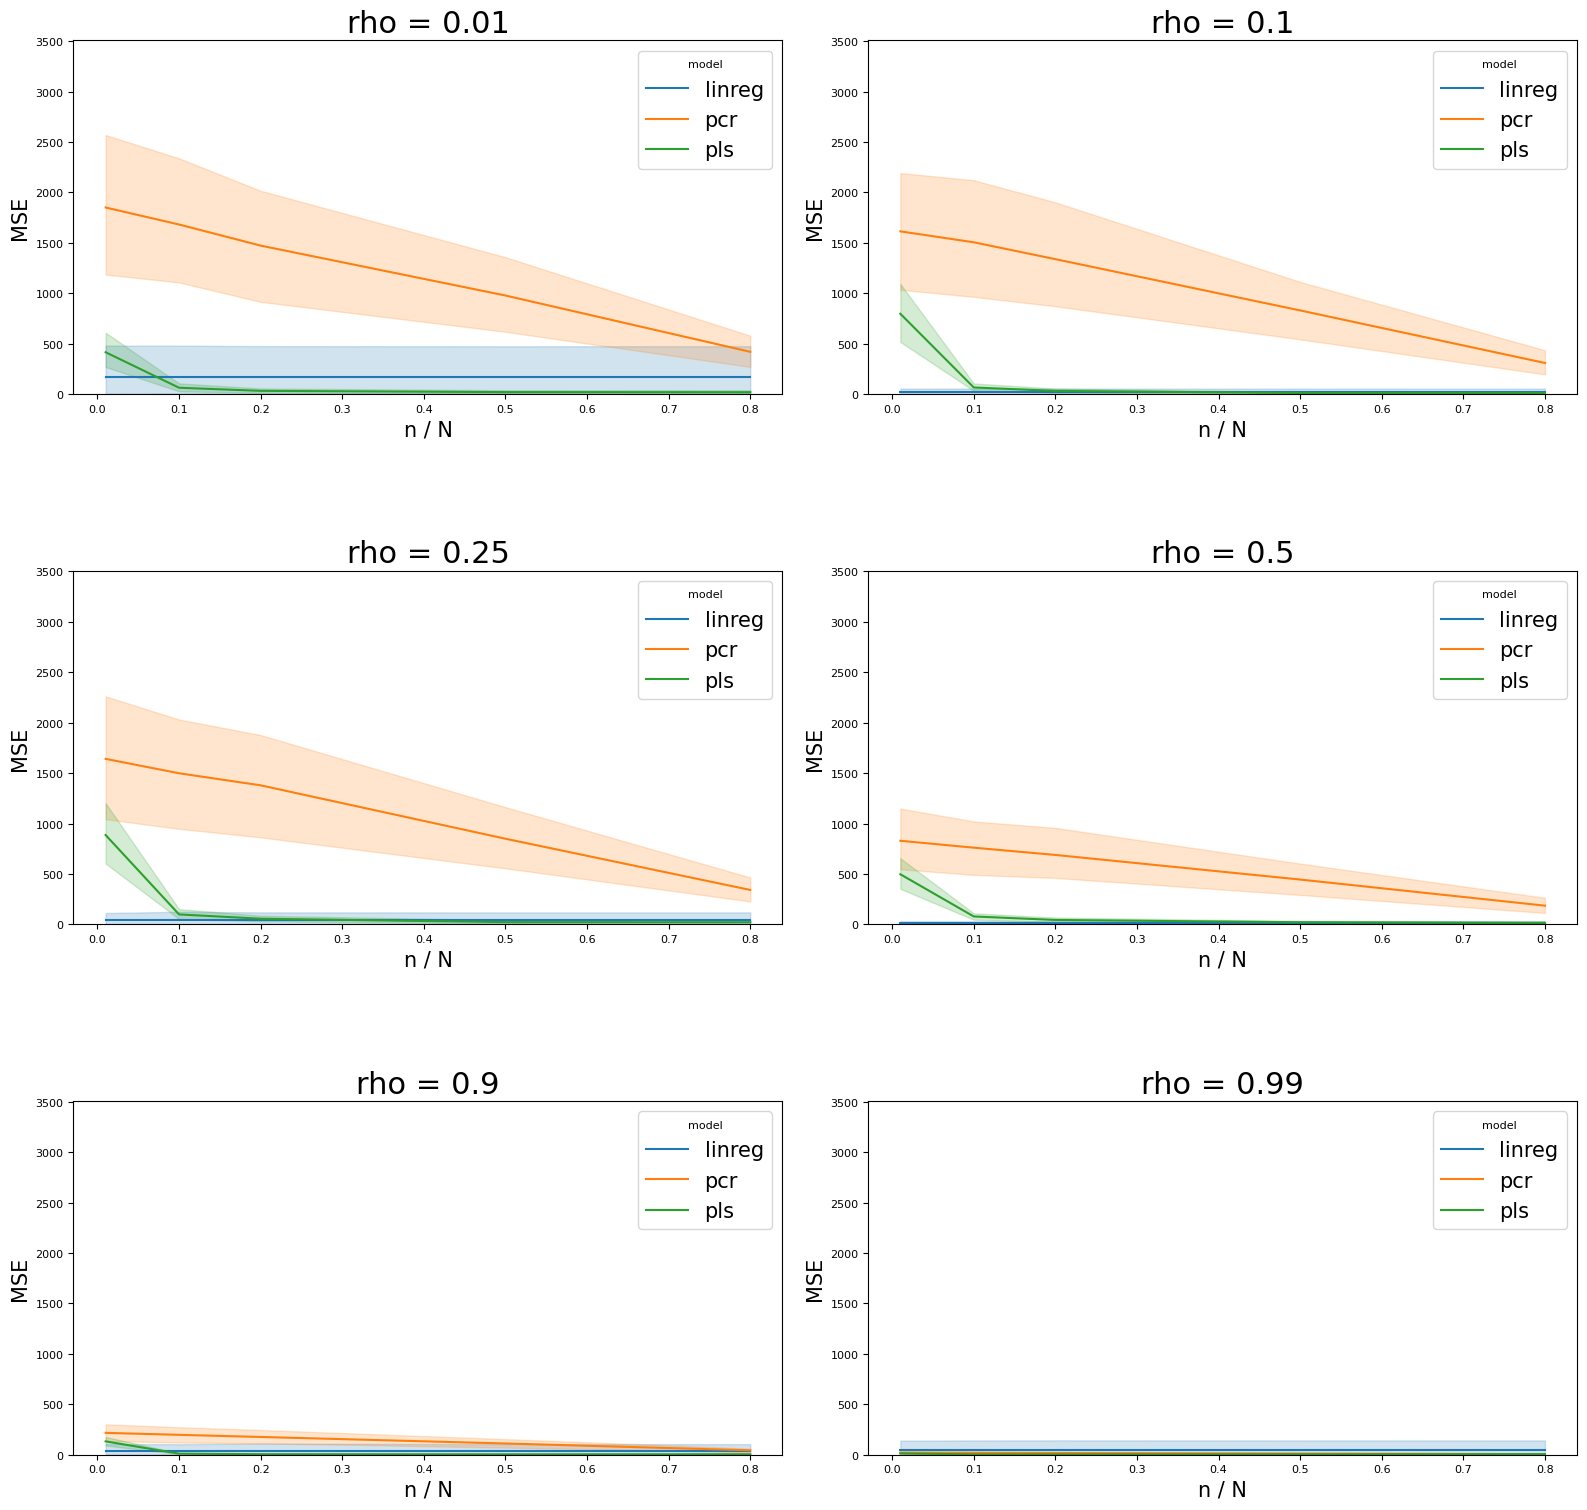

In [107]:
plt.figure(figsize=(16, 20))

plt_y = 2
plt_x = df.rho.nunique() // plt_y + 1

for idx, rho in enumerate(df.rho.unique()):
    df_rho = df[(df.rho == rho)]
    plt.subplot(plt_x, plt_y, idx+1)
    plt.tight_layout(h_pad=9, w_pad=2)
    sns.lineplot(x='n_N_ratio', y='MSE', hue='model', data=df_rho)
    plt.title(f"rho = {rho}")
    plt.ylim(0.0, MSE_max*0.7)
    plt.xlabel('n / N')

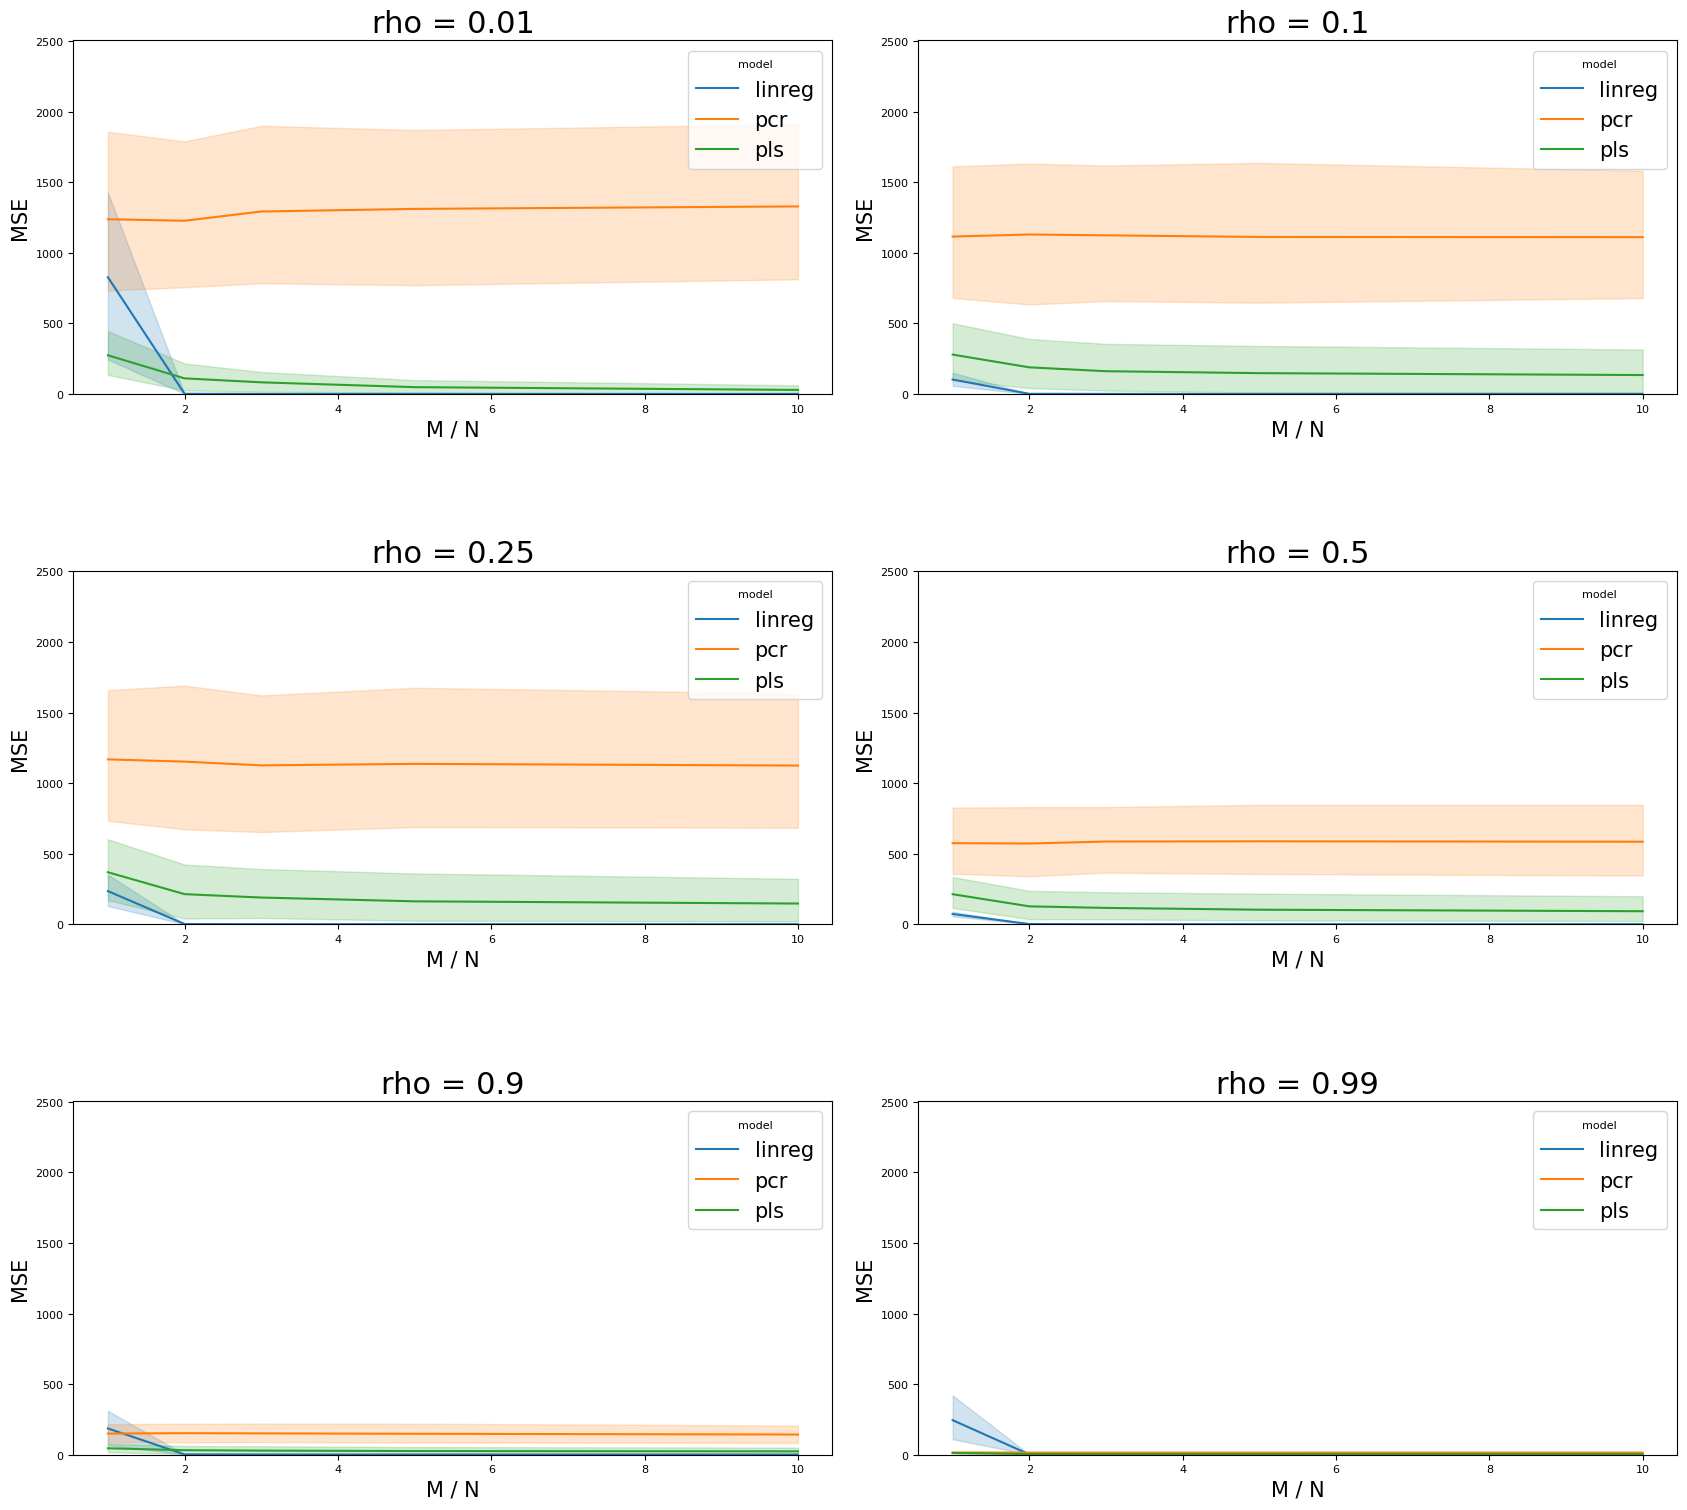

In [108]:
plt.figure(figsize=(17, 20))


plt_y = 2
plt_x = df.rho.nunique() // plt_y + 1

for idx, rho in enumerate(df.rho.unique()):
    df_rho = df[df.rho == rho]
    plt.subplot(plt_x, plt_y, idx+1)
    plt.tight_layout(h_pad=9, w_pad=2)
    sns.lineplot(x='M_N_ratio', y='MSE', hue='model', data=df_rho)
    plt.title(f"rho = {rho}")
    plt.ylim(0, MSE_max/2)
    plt.xlabel('M / N')

Među gornjim grafovima je zanimljivo uočiti kako je u slučaju najviše korelacije $\rho = 0.99$ linearna regresija najlošija među metodama ukoliko imamo malen uzorak.

Sljedeći graf prikazuje koliko metode u prosjeku ovise o koeficijentu korelacije $\rho$. Ovdje se jasno vidi da PCR više ovisi o veličini korelacije nego PLS. Također je zanimljivo da kod najveće razine korelacije $\rho = 0.99$ PLS u prosjeku čak mrvu bolje predviđa od linearne regresije.

<AxesSubplot: xlabel='rho', ylabel='MSE'>

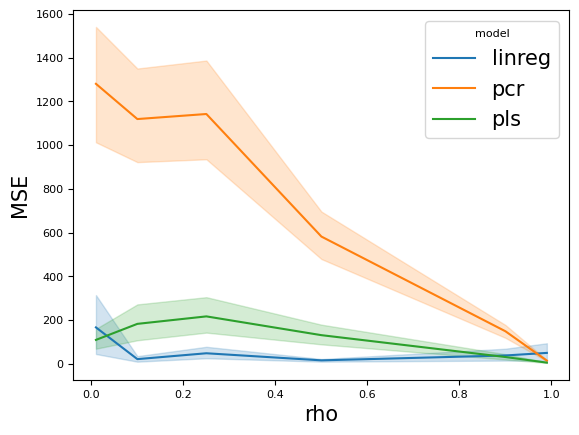

In [109]:
sns.lineplot(x='rho', y='MSE', data = df, hue='model')

In [23]:
x = df.n_N_ratio.unique()
y = df.M_N_ratio.unique()
X, Y = np.meshgrid(x, y)

In [24]:
def f(n_N_ratio, M_N_ratio):
    return df[(df.n_N_ratio == n_N_ratio) & (df.M_N_ratio == M_N_ratio)].mean()

In [27]:
x = df.n_N_ratio.unique()
y = df.M_N_ratio.unique()
X, Y = np.meshgrid(x, y)


array([[10., 10., 10., 10., 10., 10., 10.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]])

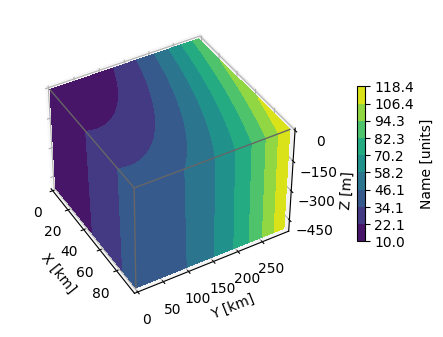

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

TypeError: Input z must be 2D, not 1D

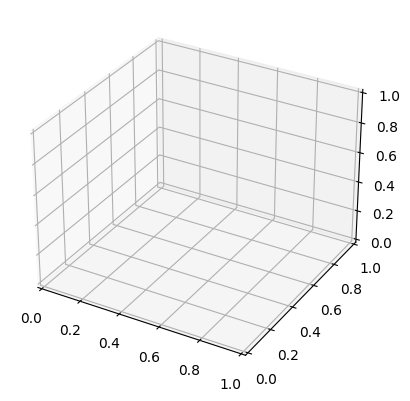

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = df.n_N_ratio.unique()
y = df.M_N_ratio.unique()
X, Y = np.meshgrid(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [26]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [29]:
Y.shape

(30, 30)